# TP1 du module 6 : les algorithmes de classification

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
* Savoir mettre en place les principaux algorithmes de classification
* Etudier l'impact de leurs paramètres sur leurs performances
* Comparer les performances de différents algorithmes

In [2]:
# Ajoutez ici les imports de librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

Commencez par charger à nouveau le jeu de données Titanic, à partir du csv généré dans le TP1 du module 4. Préparez les données d'entraînement et de test qui seront utilisées par la suite.

In [3]:
titanic = pd.read_csv("Titanic.csv")

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Partie 1 : découvrir Naive Bayes

1. Commencez par créer un modèle basé sur Naive Bayes, sans changer les paramètres par défaut, en supposant que la répartition des données correspond à une Gaussienne (loi normale). Entraînez-le et testez-le. Quelle score (accuracy) obtenez-vous ? Que pouvez-vous dire de la précision et du rappel ? Comparez avec les scores obtenus sur les arbres de décision au module 5 : avez-vous des hypothèses pour expliquer cette différence ?

In [4]:
gnb = GaussianNB()

#Entraînement
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)

#Test
print("Accuracy : ", gnb.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

# sauvegarde des scores
nb_best_accuracy = gnb.score(X_test, y_test)
nb_best_pred = precision_score(y_test, y_pred)
nb_best_recall = recall_score(y_test, y_pred)

Accuracy :  0.6983240223463687
Precision :  0.7391304347826086
Rappel :  0.26153846153846155


**Observation :** le score d'accuracy est faible, d'autant plus en comparaison de performances de l'arbre de décision. Il est possible que l'hypothèse d'indépendance des variables ne soit pas adapté pour les données du Titanic.

De plus, il est très intéressant de noter un bon rappel mais une mauvaise précision : cela signifie que si le modèle arrive à prédire correctement les dècés, il le fait en faisant énormément d'erreur sur la survie.

2. Affichez une matrice de corrélation des données du jeu d'entraînement, en y incluant un affichage textuel de la valeur de la corrélation. Voyez-vous des informations permettant d'expliquer les performance de l'algorithme Naive Bayes ?

<Axes: >

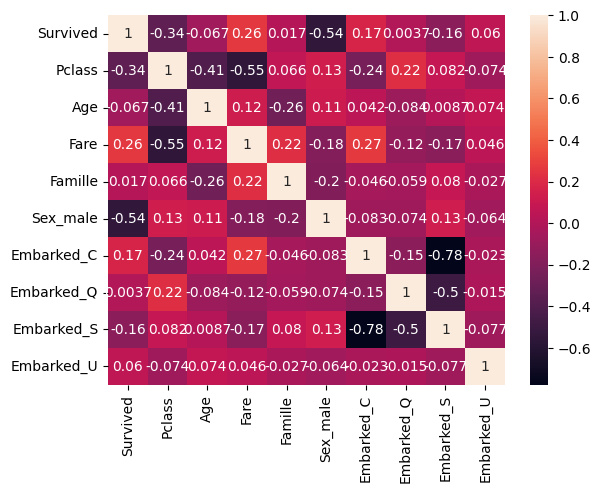

In [5]:
sns.heatmap(titanic.corr(),annot=True)

**Observation :** Il existe en effet une certaine corrélation entre plusieurs variable (par exemple entre Fare et Pclass), qui mettent à mal l'hypothèse d'indépendance des variables supposée par l'algorithme Naive Bayes.

3. Proposez une représentation graphique des attributs continus, permettant de vérifier l'hypothèse que nous avons faite, selon laquelle ces données suivent une loi normale (Gaussienne).

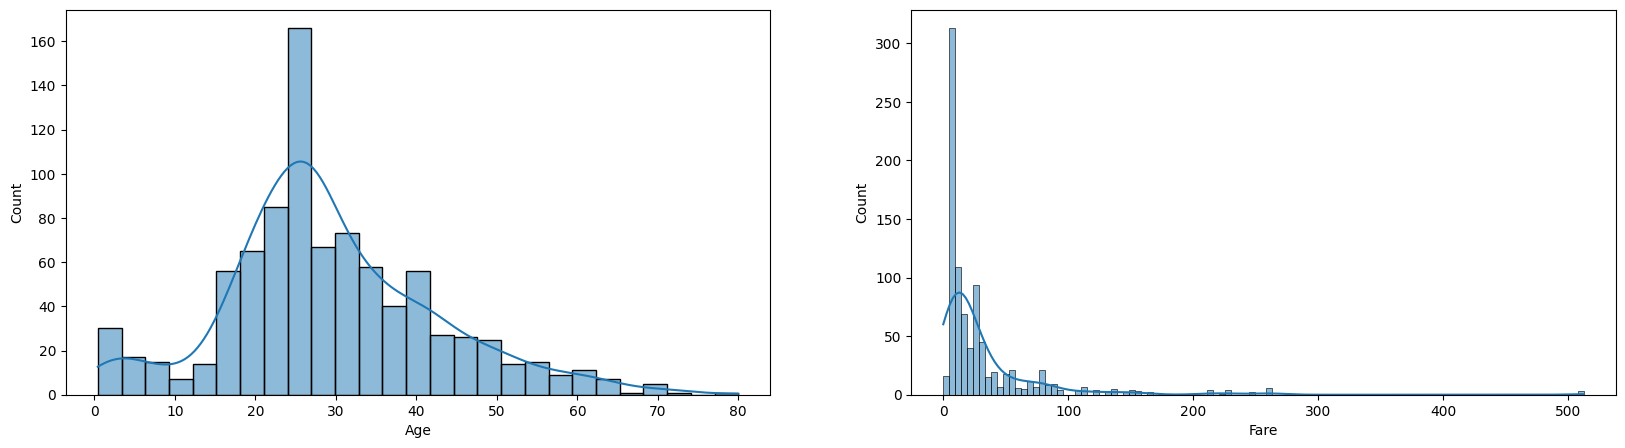

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
i=0
for c in ['Age', 'Fare']:
    sns.histplot(X, x=c, kde=True, ax=axes[i])
    i+=1

**Observation :** la répartition des données continues semble cohérente avec une loi Normale pour l'âge, mais moins adaptée pour le prix des billets. Cet élément peut également expliquer le faible score obtenu avec l'agorithme Naive Bayes.

## Partie 2 : découvrir KNN

1. Commencez par créer un modèle knn, en gardant le nombre de voisins par défaut (à regarder dans la documentation). Que pouvez-vous dire de l'accuracy, de la précision et du rappel ?

In [6]:
knn = KNeighborsClassifier()

#Entraînement
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

#Test
print("Accuracy : ", knn.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.6871508379888268
Precision :  0.5487804878048781
Rappel :  0.703125


**Observation :** on obtient cette fois un meilleur score pour le rappel. L'écart avec la précision est bien moins important, indiquant que le modèle semble faire de bonnes prédictions de manière équilibrée entre les deux classes.

2. Nous allons maintenant observer l'impact du nombre de voisins à prendre en considération. Faite varier k entre 1 et 20. Calculez à chaque fois accuracy, précision, et rappel. Tracez l'évolution de ces trois scores en fonction de k, sur un même graphique. Que constatez-vous ? Affichez la valeur de k pour laquelle l'accuracy est la plus élevée.

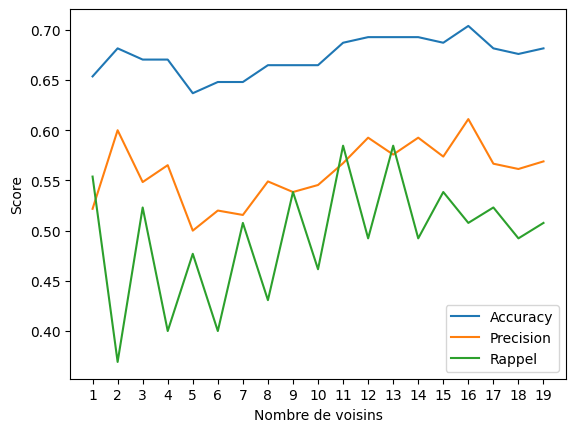

Score maximum pour k = 16


In [7]:
accuracies = []
precisions = []
recalls = []
k_range = range(1,20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(k_range, accuracies, label='Accuracy')
plt.plot(k_range, precisions, label='Precision')
plt.plot(k_range, recalls, label='Rappel')
plt.xticks(range(1, 20))
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.legend()
plt.show()

k_max = np.argmax(accuracies) + 1
print("Score maximum pour k =", k_max)

3. En prenant la valeur de k qui vous semble la plus pertinente, faite varier la dimension (p) utilisée pour calculer la distance de Minkowski entre deux données. Cette distance a-t'elle un fort impact sur les résultats d'accuracy obtenus ? Montrez-le en montrant l'évolution de ce score en fonction de p (faire varier entre 1 et 10). Ajoutez également la précision et le rappel.

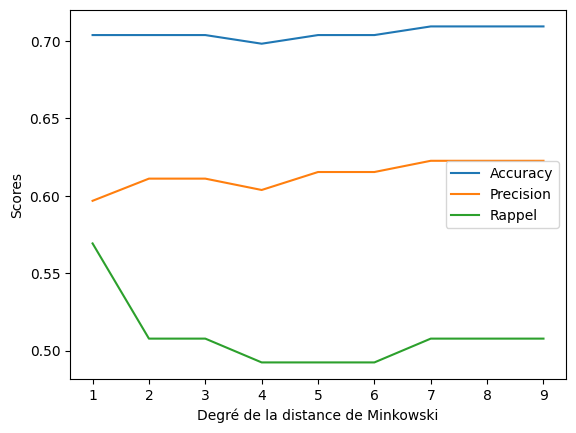

Score maximum pour p = 7


In [8]:
accuracies = []
precisions = []
recalls = []

p_range = range(1,10)

for dim in p_range:
    knn = KNeighborsClassifier(n_neighbors=k_max, p=dim)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(p_range, accuracies, label='Accuracy')
plt.plot(p_range, precisions, label='Precision')
plt.plot(p_range, recalls, label='Rappel')
plt.xticks(p_range)
plt.xlabel('Degré de la distance de Minkowski')
plt.ylabel('Scores')
plt.legend()
plt.show()

prof_max = np.argmax(accuracies) + 1
print("Score maximum pour p =", prof_max)

# sauvegarde des scores
knn_best_accuracy = accuracies[prof_max-1]
knn_best_pred = precisions[prof_max-1]
knn_best_recall = recalls[prof_max-1]

**Observation :** la différence n'est pas énorme mais elle existe. Ainsi, prendre cette prof_max semble légèrement améliorer les performances.

## Partie 3 : découvrir les SVM

1. Créez un modèle de classification basée sur les machines à vecteur de support. Dans un premier temps, gardez les options par défaut. Que pouvez-vous dire des performances obtenues (accuracy, précision, rappel) ?

In [9]:
svm = SVC()

#Entraînement
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

#Test
print("Accuracy : ", svm.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.6815642458100558
Precision :  0.35365853658536583
Rappel :  0.8787878787878788


**Observation :** on obtient une accuracy similaire à KNN, mais on peut remarquer que le rappel est bien meilleur que la précision. Cela peut s'expliquer par le noyau utilisé, qui ne correspond peut-être pas à la distribution des données.

2. Testez les différents noyaux disponibles pour l'algorithme SVM (linéaire, polynomial, rbf et sigmoïde). Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque noyau. Il y en a t'il un qui semble plus pertinent que les autres ? Affichez-le, ainsi que les scores obtenus pour ce noyau.

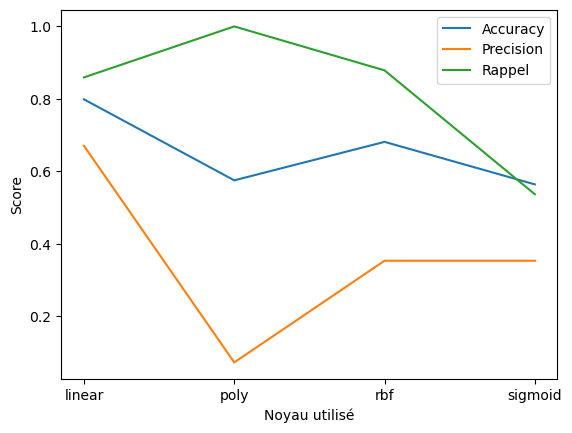

Noyau optimal :  linear
Accuracy du noyau linear :  0.7988826815642458
Précision du noyau linear :  0.6707317073170732
Rappel du noyau linear :  0.859375


In [13]:
noyaux = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = []
precisions = []
recalls = []

for n in noyaux:
    svm = SVC(kernel=n)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(noyaux, accuracies, label='Accuracy')
plt.plot(noyaux, precisions, label='Precision')
plt.plot(noyaux, recalls, label='Rappel')
plt.xticks(noyaux)
plt.xlabel('Noyau utilisé')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleur_noyau = np.argmax(accuracies)
meilleur_noyau = noyaux[pos_meilleur_noyau]
print("Noyau optimal : ", meilleur_noyau)
print("Accuracy du noyau", meilleur_noyau, ": ", accuracies[pos_meilleur_noyau])
print("Précision du noyau", meilleur_noyau, ": ", precisions[pos_meilleur_noyau])
print("Rappel du noyau", meilleur_noyau, ": ", recalls[pos_meilleur_noyau])

3. Nous allons essayer d'améliorer les performances obtenues avec le noyau polynomial. Utilisez ce noyau, et faites varier le degré du polynôme utilisé de 1 à 10. Représentez graphiquement l'accuracy, la précision et le rappel, en fonction du degré du polynôme. Il y en a t'il un qui semble plus pertinent que les autres ? Affichez-le, ainsi que les scores obtenus pour cette valeur. Comparez avec le meilleur score obtenu à la question précédente.

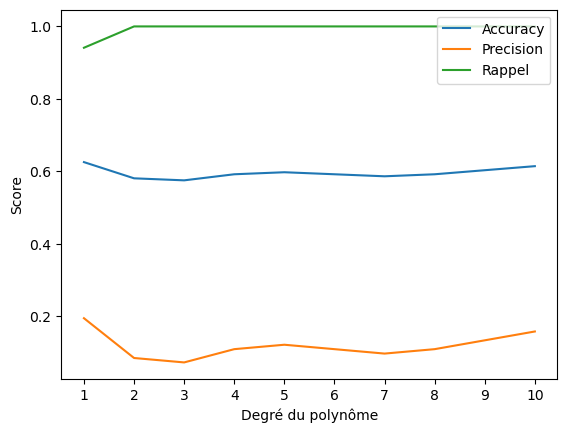

Degré optimal :  1
Accuracy du degré 1 :  0.6256983240223464
Précision du degré 1 :  0.1951219512195122
Rappel du degré 1 :  0.9411764705882353


In [38]:
degrees = range(1,11)

accuracies = []
precisions = []
recalls = []

for d in degrees:
    svm = SVC(kernel='poly', degree=d)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(degrees, accuracies, label='Accuracy')
plt.plot(degrees, precisions, label='Precision')
plt.plot(degrees, recalls, label='Rappel')
plt.xticks(degrees)
plt.xlabel('Degré du polynôme')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleur_noyau = np.argmax(accuracies)
meilleur_degré = degrees[pos_meilleur_noyau]
print("Degré optimal : ", meilleur_degré)
print("Accuracy du degré", meilleur_degré, ": ", accuracies[pos_meilleur_noyau])
print("Précision du degré", meilleur_degré, ": ", precisions[pos_meilleur_noyau])
print("Rappel du degré", meilleur_degré, ": ", recalls[pos_meilleur_noyau])

# sauvegarde des scores
svm_best_accuracy = accuracies[pos_meilleur_noyau]
svm_best_pred = precisions[pos_meilleur_noyau]
svm_best_recall = recalls[pos_meilleur_noyau]

## Partie 4 : découvrir les réseaux de neurones

1. Commençons par étudier le réseau le plus simple : un perceptron. A l'aide de la classe `sklearn.linear_model.Perceptron`, créez un perceptron, en gardant les options par défaut. Affichez accuracy, précision et rappel : que pensez-vous de ces performances ?

In [19]:
perceptron = Perceptron()
#Entraînement
perceptron.fit(X_train, y_train)
y_pred=svm.predict(X_test)

#Test
print("Accuracy : ", perceptron.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.6424581005586593
Precision :  0.15853658536585366
Rappel :  1.0


**Observation :** on observe à nouveau une accuracy assez basse, avec un énorme déséquilibre entre précision et rappel : les bonnes prédictions des décès semblent se faire en se trompant énormément sur les survies.

2. Regardez la documentation pour créer un réseau de neurones (`sklearn.neural_network.MLPClassifier`) : quelle est la structure d'un réseau de neurones par défaut avec scikit-learn ? Combien de couches cachées ? Combien de neurones par couche ?

**Réponse :**
Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

Par défaut, il n'y qu'une seule couche cachée, composée de 100 neurones.

2. Créer un réseau de neurones, en gardant ces options par défaut. Affichez accuracy, précision et rappel : que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ? Avez-vous un message d'alerte ?

In [12]:
ann = MLPClassifier()
#Entraînement
ann.fit(X_train, y_train)
y_pred=ann.predict(X_test)

#Test
print("Accuracy : ", ann.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.7988826815642458
Precision :  0.6933333333333334
Rappel :  0.8


**Observation :** on obtient un bien meilleur score qu'avec un perceptron. On peut notamment voir que la précision s'est considérablement améliorée.

3. Si vous avez observé un message d'alerte sur la question précédent, que signifie-t'il selon vous ? Que pouvez-vous faire pour y remédier ? Proposez un code permettant d'obtenir des résultats, sans message d'alerte. Qu'observez-vous sur l'évolution des scores ?

In [21]:
ann = MLPClassifier(max_iter=300)
#Entraînement
ann.fit(X_train, y_train)
y_pred=ann.predict(X_test)

#Test
print("Accuracy : ", ann.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.7821229050279329
Precision :  0.6707317073170732
Rappel :  0.8208955223880597


4. Nous allons à présent comparer différentes architectures du réseau de neurones :
- Trois couches de 50 neurones chacune
- Cinq couches de 50 neurones chacune
- Trois couches : première avec 50, deuxième avec 100, troisième avec 50 neurones
- Cinq couches : première avec 50, deuxième avec 100, troisième avec 50 neurones, quatrième avec 100, cinquième avec 50 neurones

Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque architecture. Il y en a t'il une qui semble plus pertinente que les autres ? Affichez-la, ainsi que les scores obtenus pour cette architecture. Comparez avec le score obtenu par l'architecture par défaut. Votre code ne doit générer aucun message d'alerte.

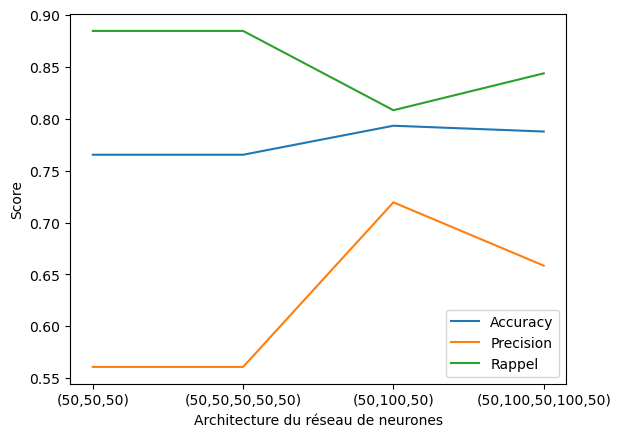

Architecture optimale :  (50, 100, 50)
Accuracy de l'architecture (50, 100, 50) :  0.7932960893854749
Précision de l'architecture (50, 100, 50) :  0.7195121951219512
Rappel de l'architecture (50, 100, 50) :  0.8082191780821918


In [43]:
architectures = [(50,50,50),(50,50,50,50,50),(50,100,50),(50,100,50,100,50),]
labels = ['(50,50,50)','(50,50,50,50,50)','(50,100,50)','(50,100,50,100,50)']

accuracies = []
precisions = []
recalls = []

for archi in architectures:
    ann = MLPClassifier(max_iter=500, hidden_layer_sizes=archi)
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(labels, accuracies, label='Accuracy')
plt.plot(labels, precisions, label='Precision')
plt.plot(labels, recalls, label='Rappel')
plt.xticks(labels)
plt.xlabel('Architecture du réseau de neurones')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleure_archi = np.argmax(accuracies)
meilleure_archi = architectures[pos_meilleure_archi]
print("Architecture optimale : ", meilleure_archi)
print("Accuracy de l'architecture", meilleure_archi, ": ", accuracies[pos_meilleure_archi])
print("Précision de l'architecture", meilleure_archi, ": ", precisions[pos_meilleure_archi])
print("Rappel de l'architecture", meilleure_archi, ": ", recalls[pos_meilleure_archi])

5. En utilisant l'architecture qui vous donnait les meilleures performances, étudier l'impact de la fonction d'activation utilisée sur les performances. Représentez sur un graphiques les scores (accuracy, précision et rappel) obtenus pour les quatres fonctions d'activation proposées par scikit-learn. Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associés.

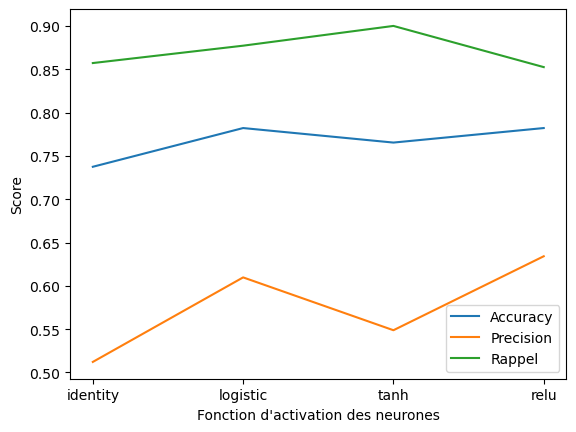

Fonction d'activation optimale :  logistic
Accuracy de la fonction logistic :  0.7821229050279329
Précision de la fonction logistic :  0.6097560975609756
Rappel de la fonction logistic :  0.8771929824561403


In [39]:
activations = ['identity', 'logistic', 'tanh', 'relu']

accuracies = []
precisions = []
recalls = []

for f in activations:
    ann = MLPClassifier(hidden_layer_sizes=meilleure_archi,max_iter=500, activation=f)
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
plt.plot(activations, accuracies, label='Accuracy')
plt.plot(activations, precisions, label='Precision')
plt.plot(activations, recalls, label='Rappel')
plt.xticks(activations)
plt.xlabel('Fonction d\'activation des neurones')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleure_fun = np.argmax(accuracies)
meilleure_fun = activations[pos_meilleure_fun]
print("Fonction d'activation optimale : ", meilleure_fun)
print("Accuracy de la fonction", meilleure_fun, ": ", accuracies[pos_meilleure_fun])
print("Précision de la fonction", meilleure_fun, ": ", precisions[pos_meilleure_fun])
print("Rappel de la fonction", meilleure_fun, ": ", recalls[pos_meilleure_fun])

# sauvegarde des scores
ann_best_accuracy = accuracies[pos_meilleure_fun]
ann_best_pred = precisions[pos_meilleure_fun]
ann_best_recall = recalls[pos_meilleure_fun]

## Partie 5 : comparer les performances des différents algorithmes

Nous allons à présent résumer les différentes performances des algorithmes que vous avez testé dans ce TP : récupérez les meilleurs scores (accuracy) obtenu pour chaque algorithme. Représentez-les sur un diagramme en barres, en regroupant par algorithme, et en représentant chaque score par une couleur. Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

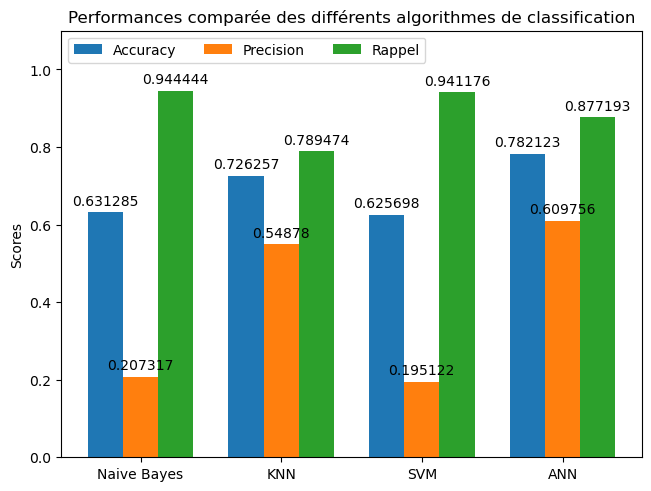

In [41]:
algos = ['Naive Bayes', 'KNN', 'SVM', 'ANN']

scores = {
    'Accuracy': (nb_best_accuracy, knn_best_accuracy, svm_best_accuracy, ann_best_accuracy),
    'Precision': (nb_best_pred, knn_best_pred, svm_best_pred, ann_best_pred),
    'Rappel': (nb_best_recall, knn_best_recall, svm_best_recall, ann_best_recall)
}

x = np.arange(len(algos))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, value in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performances comparée des différents algorithmes de classification')
ax.set_xticks(x + width, algos)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.1)

plt.show()

## Partie 6 : optimiser la recherche des paramètres optimaux

Dans ce TP, nous avons souvent cherché à identifier la meilleur combinaison de paramètres. Nous avons procédé par itération, en cherchant à fixer un paramètre avant de faire évoluer les autres. Cette méthode est couteuse, et pour faire une recherche exhaustive, nécessite, de répéter très souvent le même code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de paramétrage optimal.

Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Le principe est de définir un dictionnaire, où la clé correspond à un paramètre, et la valeur à la liste de valeurs possibles à tester pour le paramètre considéré. 

**Consigne :** Appliquez ce principe pour déterminer la meilleure combinaison possible pour le réseau de neurones, en repartant des différentes configurations testées dans les parties précédentes.

In [47]:
parameters = {
    "hidden_layer_sizes": [(50,50,50),(50,50,50,50,50),(50,100,50),(50,100,50,100,50),],
    "activation": ['identity', 'logistic', 'tanh', 'relu']
}

ann = MLPClassifier(max_iter=500)

ann = GridSearchCV(
    ann, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

ann.fit(X_train, y_train)

print('-----')
print(f'Meilleurs paramètres {ann.best_params_}')
print(
    f'Score moyen de validation croisée pour la meilleure combinaison de paramètres: ' + 
    f'{ann.best_score_:.3f}'
)


C:\Users\mleguilly\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mleguilly\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----
Best parameters {'activation': 'logistic', 'hidden_layer_sizes': (50, 100, 50)}
Mean cross-validated accuracy score of the best_estimator: 0.819


### Utilisation de pipeline pour chainer plusieurs actions

In [ ]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=n_estimators,
                                                                             criterion=criterion,
                                                                             max_depth=max_depth,
                                                                             class_weight=None))